Iteration 9: 100%|██████████████████████████████████████| 50/50 [00:00<00:00, 2380.91it/s, episode=500, return=-61.700]


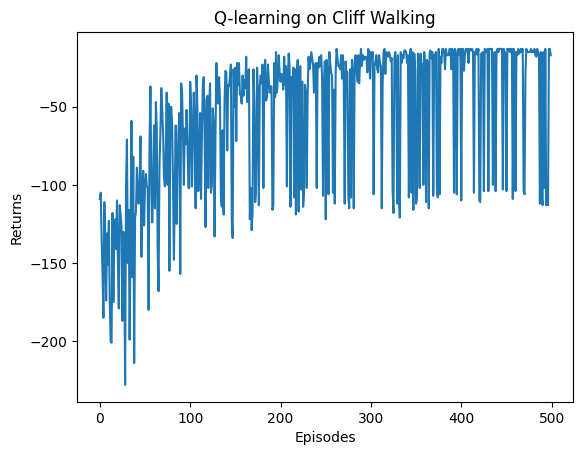

Q-learning算法最终收敛得到的策略为：
^ooo ovoo ovoo ^ooo ^ooo ovoo ooo> ^ooo ^ooo ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ^ooo ooo> ooo> ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [9]:
class QLearning:
    """ Q-learning算法 """
    def __init__(self, ncol, nrow, epsilon, alpha, gamma, n_action=4):
        self.Q_table = np.zeros([nrow * ncol, n_action])  # 初始化Q(s,a)表格
        self.n_action = n_action  # 动作个数
        self.alpha = alpha  # 学习率
        self.gamma = gamma  # 折扣因子
        self.epsilon = epsilon  # epsilon-贪婪策略中的参数

        ## 获取当前采取的行动，采取了ε-贪婪策略
    def take_action(self, state):  # 选取下一步的操作,具体实现为epsilon-贪婪
        if np.random.random() < self.epsilon:           ##  随机选择一个动作
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])     ##  拿到动作价值最大的动作
        return action

    ## 拿到每个状态最优的动作，最优动作标记1，其他的动作标记0
    def best_action(self, state):  # 用于打印策略
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a

    '''
    增量更新动作价值函数，对应相应的Q-learning公式
    和sarsa algorithm不同的地方就是，这使用了状态内所有动作的最大值，但是sarsa直接使用了(s, a)状态动作对的值
    sarsa的公式就是：
    def update(self, s0, a0, r, s1, a1):
        td_error = r + self.gamma * self.Q_table[s1, a1] - self.Q_table[s0, a0]    ## 算时序差分的
        self.Q_table[s0, a0] += self.alpha * td_error      ##  更新动作价值函数
    '''
    def update(self, s0, a0, r, s1):
        td_error = r + self.gamma * self.Q_table[s1].max() - self.Q_table[s0, a0]
        self.Q_table[s0, a0] += self.alpha * td_error


np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
agent = QLearning(ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

return_list = []  # 记录每一条序列的回报
for i in range(10):  # 显示10个进度条
    # tqdm的进度条功能
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
            episode_return = 0
            state = env.reset()
            done = False
            while not done:
                action = agent.take_action(state)
                next_state, reward, done = env.step(action)
                episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                agent.update(state, action, reward, next_state)
                state = next_state
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Q-learning on {}'.format('Cliff Walking'))
plt.show()

action_meaning = ['^', 'v', '<', '>']
print('Q-learning算法最终收敛得到的策略为：')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])

# Iteration 0: 100%|██████████| 50/50 [00:00<00:00, 1183.69it/s, episode=50,
# return=-105.700]
# Iteration 1: 100%|██████████| 50/50 [00:00<00:00, 1358.13it/s, episode=100,
# return=-70.900]
# Iteration 2: 100%|██████████| 50/50 [00:00<00:00, 1433.72it/s, episode=150,
# return=-56.500]
# Iteration 3: 100%|██████████| 50/50 [00:00<00:00, 2607.78it/s, episode=200,
# return=-46.500]
# Iteration 4: 100%|██████████| 50/50 [00:00<00:00, 3007.19it/s, episode=250,
# return=-40.800]
# Iteration 5: 100%|██████████| 50/50 [00:00<00:00, 2005.77it/s, episode=300,
# return=-20.400]
# Iteration 6: 100%|██████████| 50/50 [00:00<00:00, 2072.14it/s, episode=350,
# return=-45.700]
# Iteration 7: 100%|██████████| 50/50 [00:00<00:00, 4244.04it/s, episode=400,
# return=-32.800]
# Iteration 8: 100%|██████████| 50/50 [00:00<00:00, 4670.82it/s, episode=450,
# return=-22.700]
# Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 4705.19it/s, episode=500,
# return=-61.700]

# Q-learning算法最终收敛得到的策略为：
# ^ooo ovoo ovoo ^ooo ^ooo ovoo ooo> ^ooo ^ooo ooo> ooo> ovoo
# ooo> ooo> ooo> ooo> ooo> ooo> ^ooo ooo> ooo> ooo> ooo> ovoo
# ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo
# ^ooo **** **** **** **** **** **** **** **** **** **** EEEE